# US Border Crossing Data
> ## Introduction:
>>The US border crossing dataset contains information of the inbound crossings at the U.S.-Canada and the U.S.-Mexico borders, thus reflecting the number of vehicles, containers, passengers or pedestrians entering the United States. Not data for outbound crossing is provided.

> Firstly I will import libraries

In [1]:
import pandas as pd #for file handling purposes
import numpy as np #for simple linear algebraic expressions 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import calendar

> # File reading

In [2]:
df=pd.read_csv(r'C:\Users\mohdr\CSV Files\Border_Crossing_Entry_Data.csv')

> ## Determining the Columns in the data Set

In [3]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB
None


In [5]:
df.describe()

,Port Code,Value
count,346733.000000,3.467330e+05
mean,2455.504910,2.818767e+04
std,1201.208459,1.518588e+05
min,101.000000,0.000000e+00
25%,2304.000000,0.000000e+00
50%,3013.000000,9.000000e+01
75%,3402.000000,2.483000e+03
max,4105.000000,4.447374e+06


> ## What all borders and vehicle types were involve in the observatory dataset?

In [6]:
print(df['Border'].unique())
print(df['Measure'].unique())

['US-Mexico Border' 'US-Canada Border']
['Trucks' 'Rail Containers Full' 'Trains' 'Personal Vehicle Passengers'
 'Bus Passengers' 'Truck Containers Empty' 'Rail Containers Empty'
 'Personal Vehicles' 'Buses' 'Truck Containers Full' 'Pedestrians'
 'Train Passengers']


> Here we are able to see that not only people, but goods carriage and empty vehicles are also crossing borders.<br>
> Thus we're bifurcating the data into the number of vehilcles and the amount of people.  

In [7]:
amount_people=df[df['Measure'].isin(['Personal Vehicle Passengers','Bus Passengers','Pedestrians','Train Passengers'])]
amount_vehicles=df[df['Measure'].isin(['Trucks','Rail Containers Full','Trains','Truck Containers Empty','Rail containers Empty','Personal Vehicles','Buses','Truck Containers Full' ])]



In [8]:
amount_people[['Border','Value']].groupby(['Border']).sum()

,Value
Border,
US-Canada Border,1631864476
US-Mexico Border,5018273234


In [9]:
amount_vehicles[['Border','Value']].groupby(['Border']).sum()

,Value
Border,
US-Canada Border,1043747611
US-Mexico Border,2058570077


# Visualisation of Data

> ## Differentiating the passer-by of the two borders...

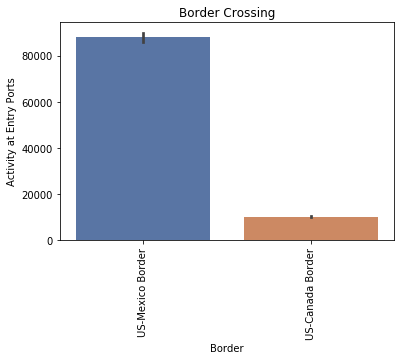

In [20]:
sns.barplot(x=df['Border'],y=df['Value'],palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Activity at Entry Ports')
plt.title('Border Crossing')
plt.show()

> ## Determination of the most Preferred mode of Transport 

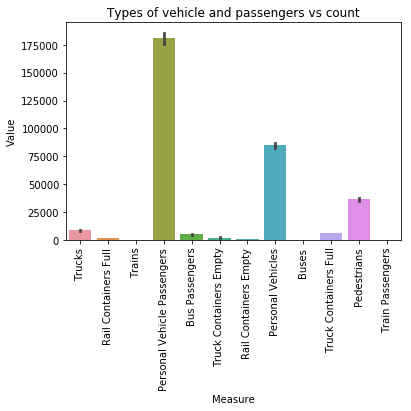

In [16]:
sns.barplot(x='Measure',y='Value',data=df)
plt.xticks(rotation=90)
plt.title('Types of vehicle and passengers vs count')
plt.show()

>> ### Applying Linear Regression Model

In [12]:
X = df[['Port Code']]
#fits column details
Y = df['Value']
lm = LinearRegression()
lm
lm.fit(X,Y)
#makes linear Regression Model
lm.score(X, Y)


0.00015018751307360745

In [13]:
df['Year']=pd.DatetimeIndex(df['Date']).year

> ## Traffic Crossing Border Per Year 

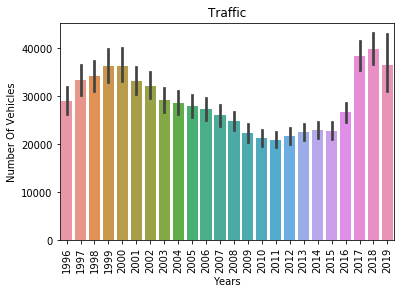

In [19]:
sns.barplot(x=df['Year'],y=df['Value'])
plt.xticks(rotation=90)
plt.title('Traffic')
plt.ylabel('Number Of Vehicles')
plt.xlabel('Years')
plt.show()

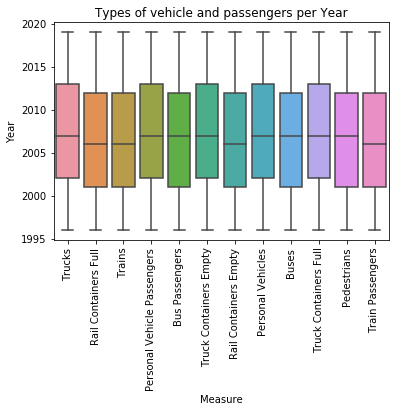

In [18]:
sns.boxplot(x='Measure',y='Year',data=df)
plt.xticks(rotation=90)
plt.title('Types of vehicle and passengers per Year')
plt.show()